# Breast Cancer Wisconsin Data Set

Create a predictive model that classifies benign vs. malignant tumors. 
See https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data for data understanding.

## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

sns.set()

## Load and inspect data set 

In [2]:
original_data = pd.read_csv("data.csv")
original_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
original_data.describe(include="all")  # descriptive statistics for all columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [4]:
original_data.isnull().sum()  # check for null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
original_data[original_data.duplicated(keep=False)]  # check for duplicate rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


There are no missing values and no duplicates, so you don't have to take actions here. 

In [15]:
original_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Inspect features

In [6]:
original_data[["radius_mean", "diagnosis"]].groupby(
    ["diagnosis"], as_index=False
).mean().sort_values(by="diagnosis", ascending=False)

,diagnosis,radius_mean
1,M,17.462830
0,B,12.146524


Inspect more feature, e.g. texture, perimeter,... 

In [7]:
# Musterlösung
original_data[["texture_mean", "diagnosis"]].groupby(
    ["diagnosis"], as_index=False
).mean().sort_values(by="diagnosis", ascending=False)

,diagnosis,texture_mean
1,M,21.604906
0,B,17.914762


In [8]:
# Musterlösung
original_data[["perimeter_mean", "diagnosis"]].groupby(
    ["diagnosis"], as_index=False
).mean().sort_values(by="diagnosis", ascending=False)

,diagnosis,perimeter_mean
1,M,115.365377
0,B,78.075406


An important step during feature selection is removing features that strongly correlate with each other. You keep only one feature as "representer" of the information and remove redundant features. There are more advanced methods to do this but, for now, just look at the correlation map and decide which features to keep.

/var/folders/ng/4m4yl74d5pgcr1p5b4gy6vxr0000gn/T/ipykernel_8888/3063024541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(original_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)


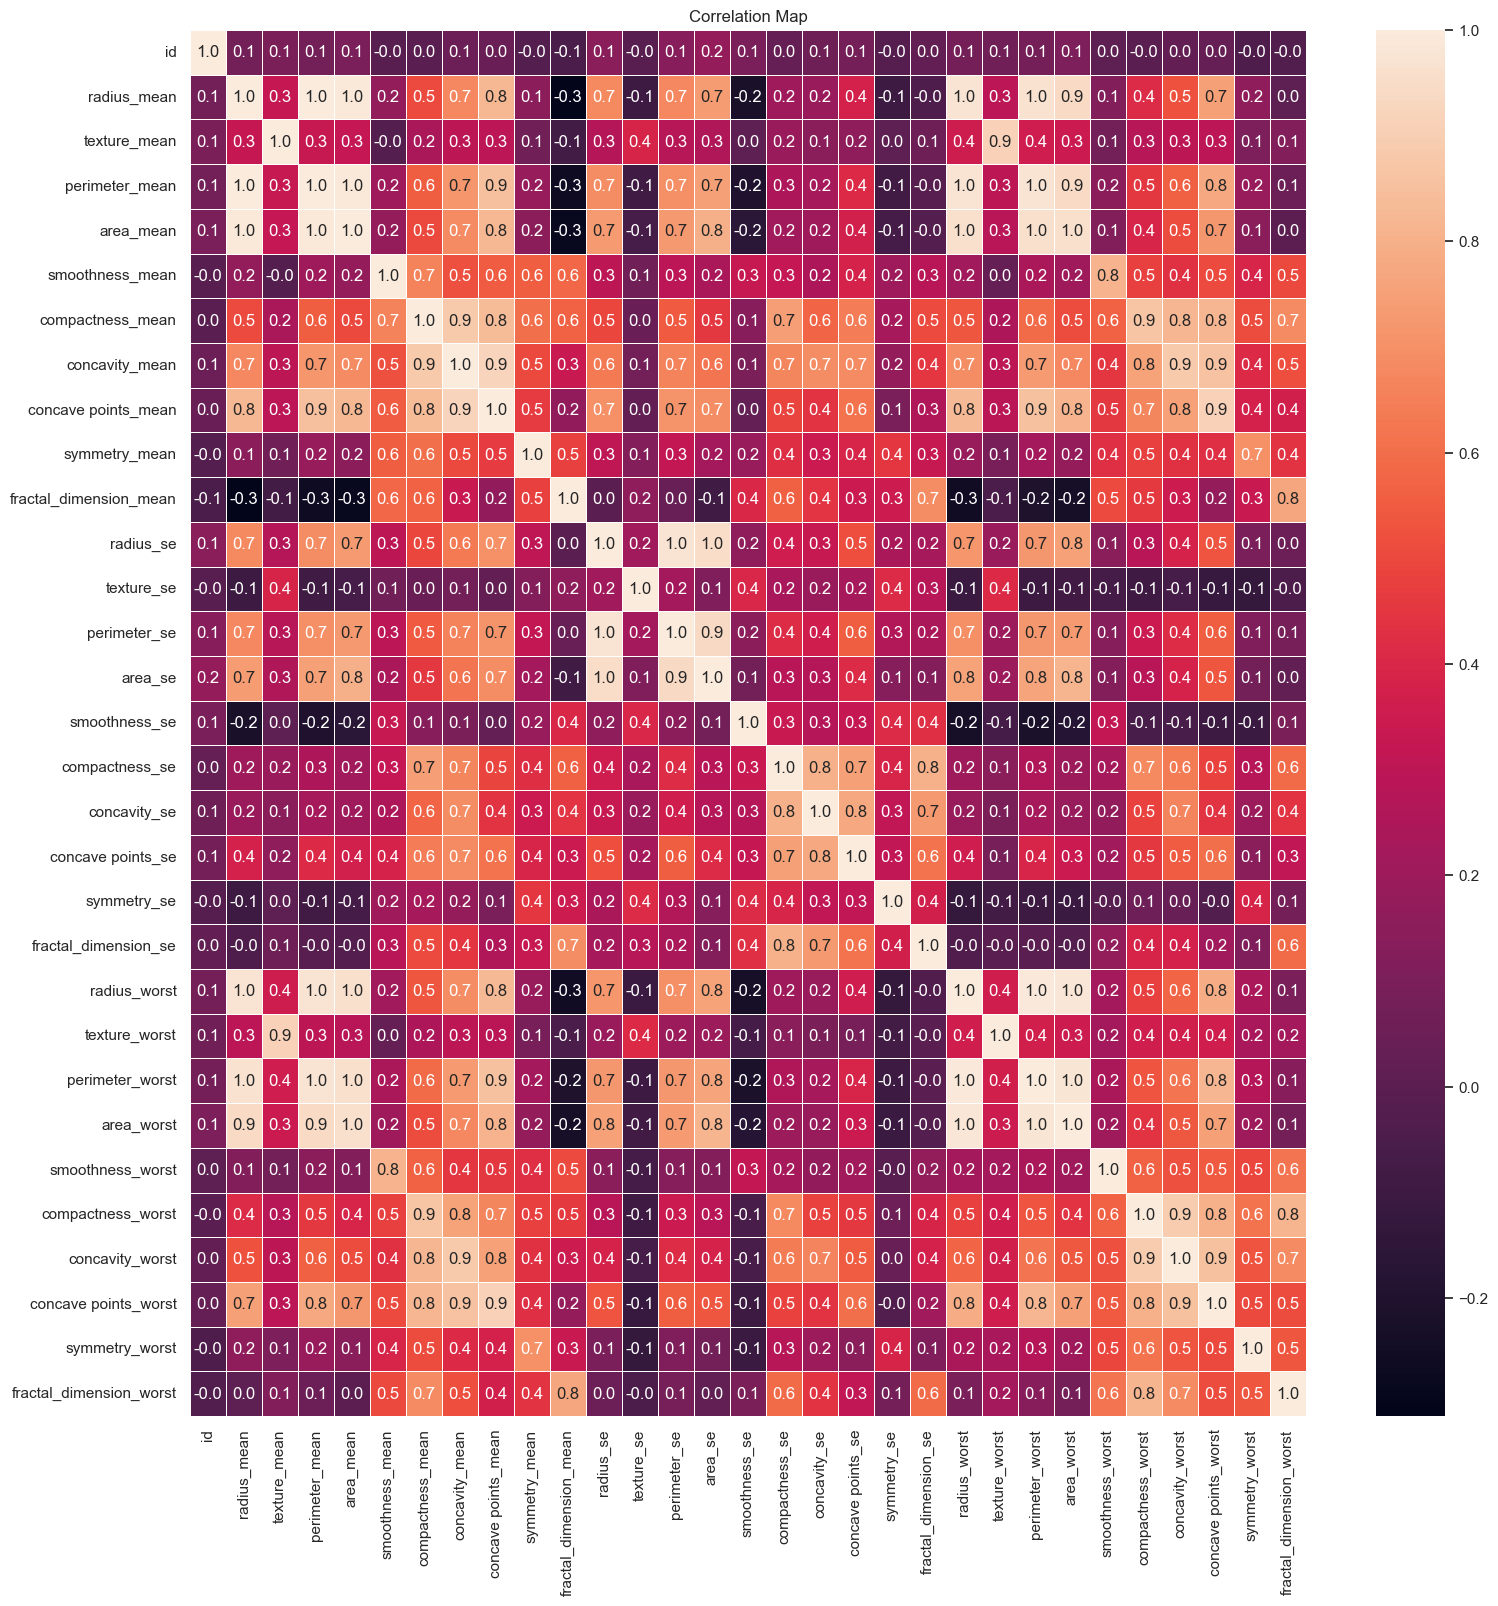

In [9]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(original_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

## Select predictors

In [11]:
# data_reduced_features = original_data[["<your feature 1>", "<your feature 2>", "..."]]

In [12]:
# Musterlösung
data_reduced_features = original_data[
    [
        "diagnosis",
        "radius_mean",
        "smoothness_mean",
        "compactness_mean",
        "symmetry_mean",
        "fractal_dimension_mean",
        "radius_se",
        "texture_se",
        "smoothness_se",
        "compactness_se",
        "symmetry_se",
        "fractal_dimension_se",
        "symmetry_worst",
    ]
]

In [13]:
data_reduced_features.head()

,diagnosis,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,M,17.99,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,0.4601
1,M,20.57,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,0.2750
2,M,19.69,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,0.3613
3,M,11.42,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,0.6638
4,M,20.29,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,0.2364


Once again, have a look at the correlation map and remove more features if necessary. 

/var/folders/ng/4m4yl74d5pgcr1p5b4gy6vxr0000gn/T/ipykernel_8888/4170924864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_reduced_features.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)


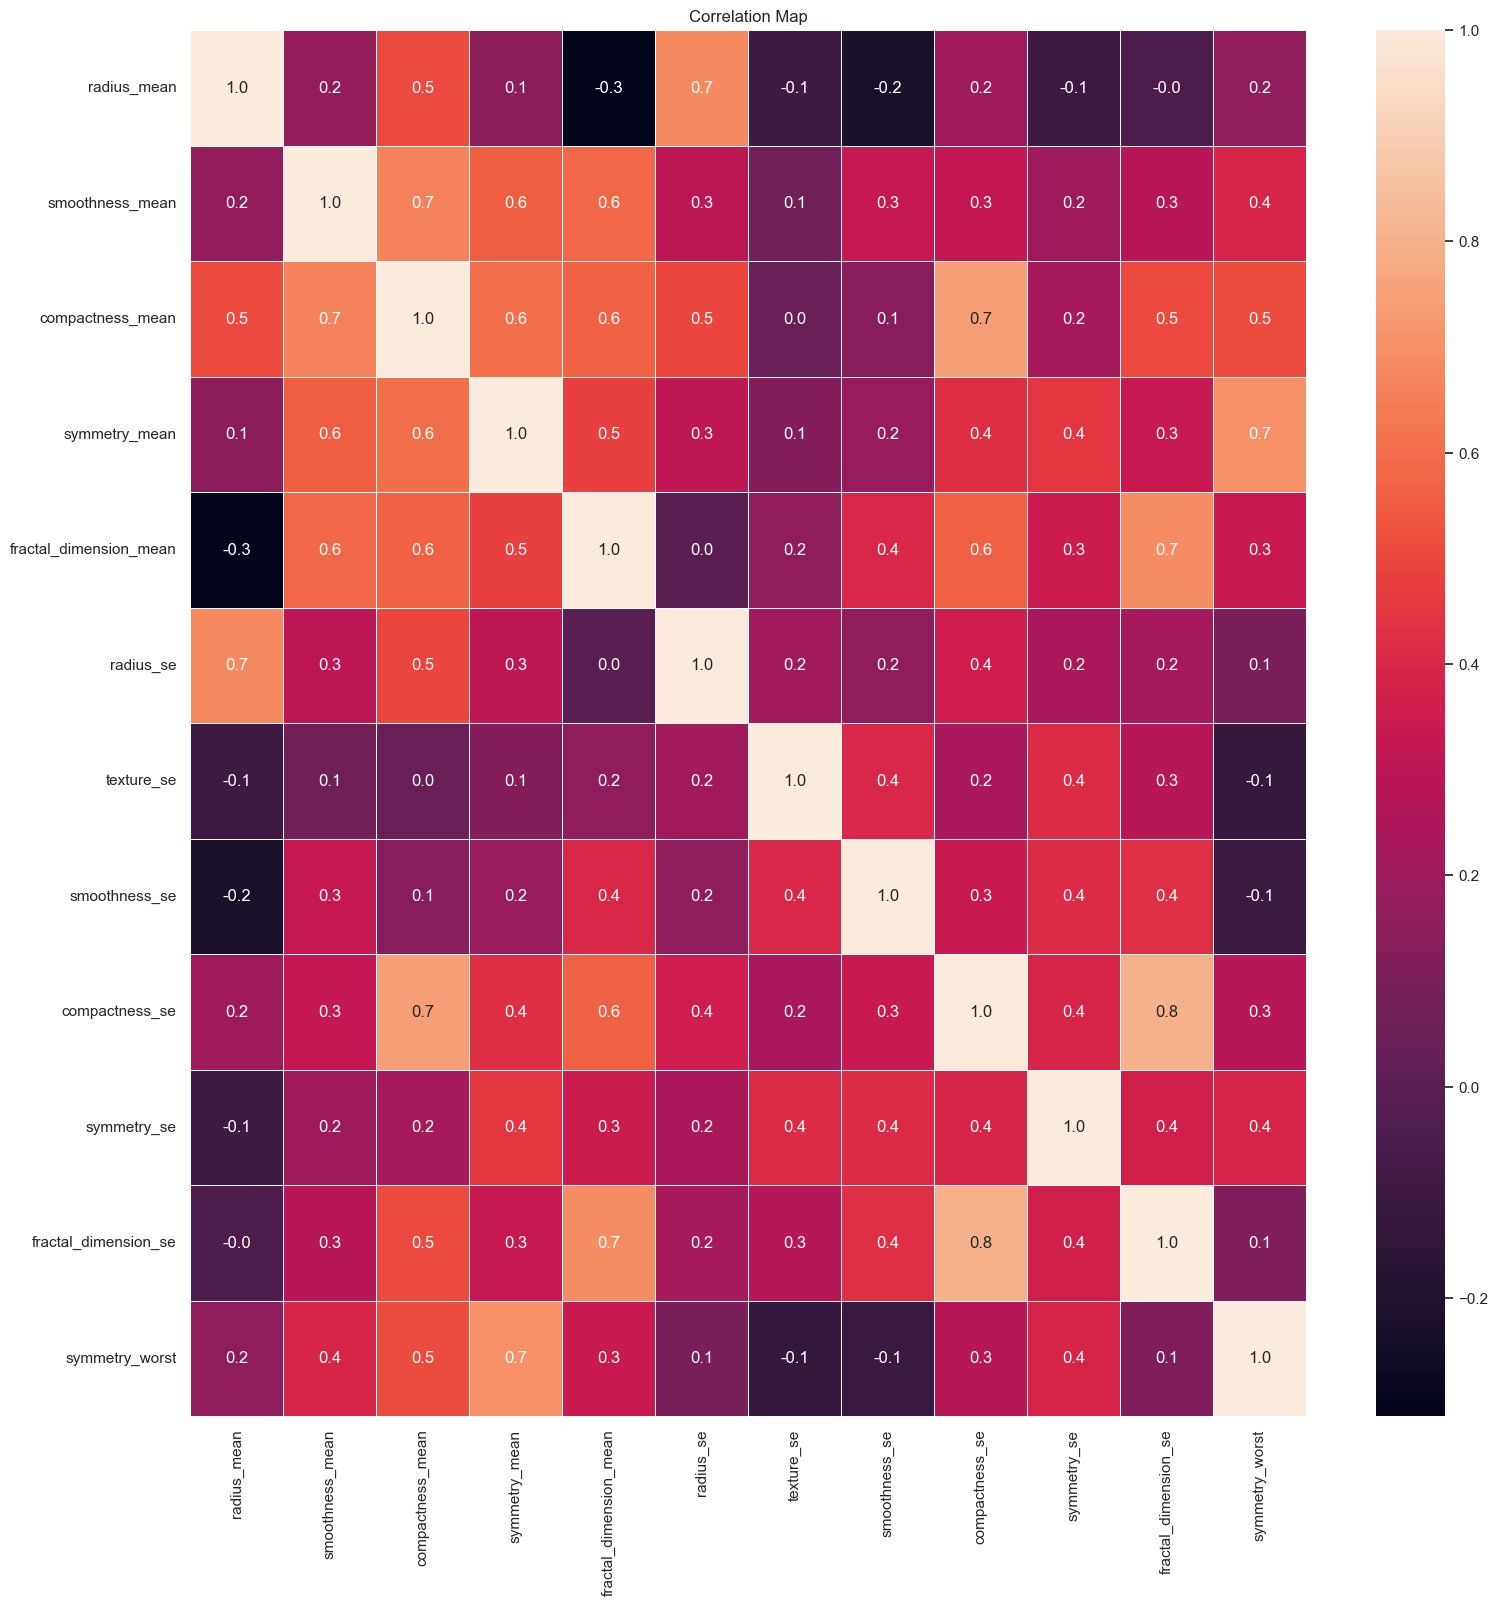

In [14]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_reduced_features.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

## Prepare for modeling

Set X and y (predictors and target) according to your dataframe:

In [ ]:
target = data_reduced_features['<your target column>']
predictors = # your code

In [16]:
# Musterlösung
target = data_reduced_features["diagnosis"]
predictors = data_reduced_features.drop(["diagnosis"], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, random_state=123
)  # 80-20 split into training and test data

Check if the dataset is balanced.

In [18]:
# Musterlösung
# Check data balancing
y_train.value_counts()

# There is no severe skew in the class distribution. No resampling needed.
# If you want to learn more about resampling, also check https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

B    284
M    171
Name: diagnosis, dtype: int64

Use StandardScaler to scale your predictors (fit on training set and transform training and test set):

In [ ]:
scaler = # your code 
# your code

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Musterlösung

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Classification models and evaluation metrics

Create a decision tree classifier: 

In [ ]:
# your code
# your code

print("train performance")
print(classification_report(y_train, tree.predict(X_train)))
print("test performance")
print(classification_report(y_test, tree.predict(X_test)))

In [20]:
# Musterlösung

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("train performance")
print(classification_report(y_train, tree.predict(X_train)))
print("test performance")
print(classification_report(y_test, tree.predict(X_test)))

train performance
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       284
           M       1.00      1.00      1.00       171

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

test performance
              precision    recall  f1-score   support

           B       0.93      0.93      0.93        73
           M       0.88      0.88      0.88        41

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



How do you evaluate this result (hints: overfitting vs. underfitting, which metric might be important for the use case and why)? 

# Musterlösung

Overfitting, seen in 100% training performance.

(Value might be different in your case depending on the predictors you have chosen! Still, there will probably be a (significant) difference between training and test performance)

recall of malign should be the most important metric:  you would rather treat a person with a benign tumor than missing a malignant one.

Text(0.5, 44.249999999999986, 'Predicted label')

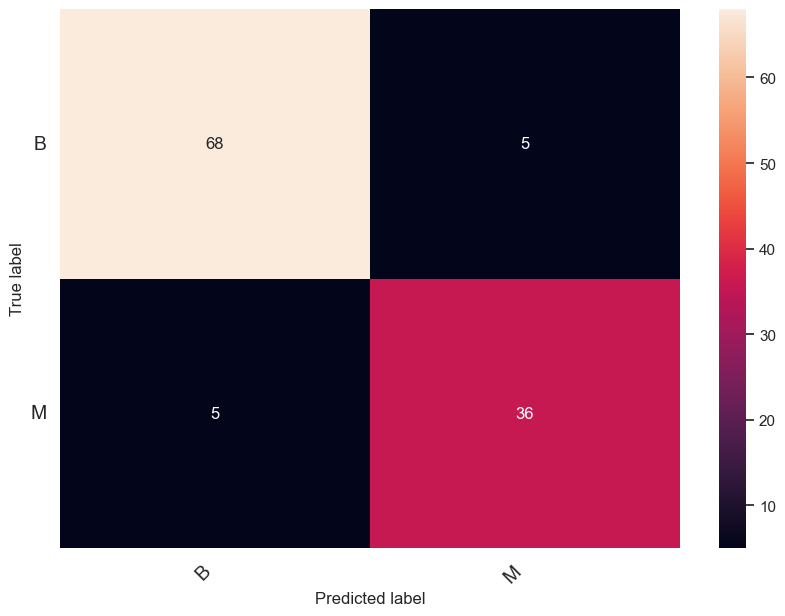

In [24]:
conf_mat = confusion_matrix(y_test, tree.predict(X_test))
df_cm = pd.DataFrame(
    conf_mat,
    index=["B", "M"],
    columns=["B", "M"],
)
fig = plt.figure(figsize=[10, 7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=14
)
plt.ylabel("True label")
plt.xlabel("Predicted label")

Create a logistic regression model: 

In [ ]:
# your code
# your code
print("train performance")
print(classification_report(y_train, logreg.predict(X_train)))
print("test performance")
print(classification_report(y_test, logreg.predict(X_test)))

In [22]:
# Musterlösung
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("train performance")
print(classification_report(y_train, logreg.predict(X_train)))
print("test performance")
print(classification_report(y_test, logreg.predict(X_test)))

train performance
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       284
           M       0.95      0.92      0.93       171

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

test performance
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        73
           M       1.00      0.90      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



How do you evaluate this result? 

# Musterlösung
overfitting seems to be no issue here

recall of malignant better than for decision tree but could still be optimized (currently around 90% for test set)

Text(0.5, 44.249999999999986, 'Predicted label')

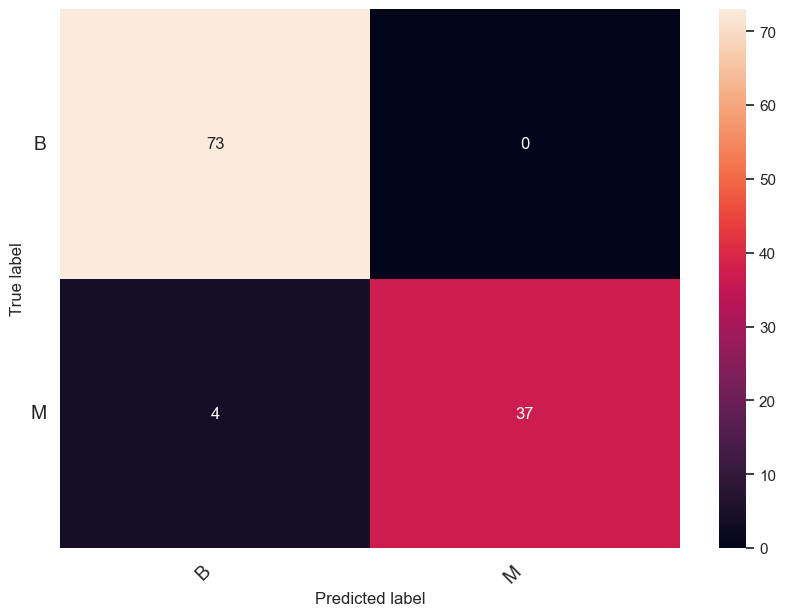

In [23]:
conf_mat = confusion_matrix(y_test, logreg.predict(X_test))
df_cm = pd.DataFrame(
    conf_mat,
    index=["B", "M"],
    columns=["B", "M"],
)
fig = plt.figure(figsize=[10, 7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=14
)
plt.ylabel("True label")
plt.xlabel("Predicted label")

Feel free to try out more classifiers (don't forget to import required packages!), change classifier parameters, modify train and test split, select other predictors,...